In [1]:
import gridgeo


gridgeo.__version__

'1.0.1+5.gd5faa0f.dirty'

In [2]:
url = 'http://crow.marine.usf.edu:8080/thredds/dodsC/FVCOM-Nowcast-Agg.nc'

grid = gridgeo.GridGeo(
    url,
    standard_name='sea_water_potential_temperature'
)

In [3]:
grid.mesh

'ugrid'

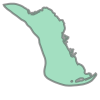

In [4]:
grid.outline

The grid has 98818 polygons, showing the first 5.


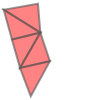

In [5]:
print(f'The grid has {len(grid.polygons)} polygons, showing the first 5.')

grid.geometry[:5]

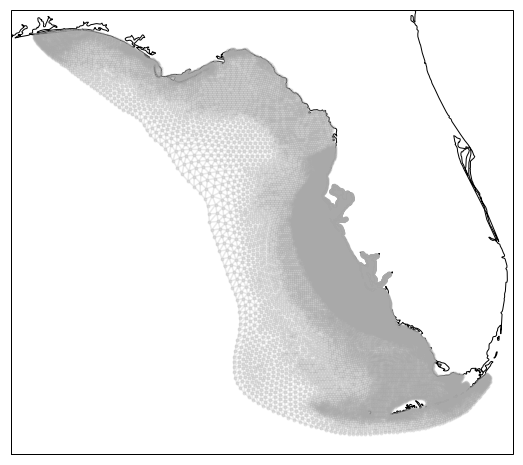

In [6]:
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


fig, ax = plt.subplots(
    figsize=(9, 9),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

kw = dict(marker='.', linestyle='-', alpha=0.25, color='darkgray')
ax.triplot(grid.triang, **kw)
ax.coastlines(resolution='10m');

In [7]:
import folium


x, y = grid.outline.centroid.xy

m = folium.Map(location=[y[0], x[0]])
folium.GeoJson(grid.outline.__geo_interface__).add_to(m)
m.fit_bounds(m.get_bounds())

m